In [1]:
# Section 0
# prepare environment and data.

# Part 0
# Load library

library(tidyverse)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Section 0
# Part 1
# prepare environment.

default_plot_width <- 7
default_plot_height <- 7
# default_plot_width <- 10
# default_plot_height <- 10
set.seed(1)

options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

options(repr.matrix.max.rows = 6)
options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)

In [3]:
# figure/table number
figure_table_number <- c(0, 0, 0, 0) # figureMajor, figureMinor, tableMajor, tableMinor

figure_number.nextMajor <- function(m="") {
    figure_table_number[1] <<- figure_table_number[1] + 1
    figure_table_number[2] <<- 0
    return (paste("Figure: ", figure_table_number[1], ".", figure_table_number[2], ". ", m, sep = ""))
}

figure_number.nextMinor <- function(m="") {
    figure_table_number[2] <<- figure_table_number[2] + 1
    return (paste("Figure: ", figure_table_number[1], ".", figure_table_number[2], ". ", m, sep = ""))
}


table_number.nextMajor <- function(m="") {
    figure_table_number[3] <<- figure_table_number[3] + 1
    figure_table_number[4] <<- 0
    return (paste("Table: ", figure_table_number[3], ".", figure_table_number[4], ". ", m, sep = ""))
}

table_number.nextMinor <- function(m="") {
    figure_table_number[4] <<- figure_table_number[4] + 1
    return (paste("Table: ", figure_table_number[3], ".", figure_table_number[4], ". ", m, sep = ""))
}


In [4]:
# Section 0
# Part 1 - continue
# prepare environment - constant
# SAMPLE_SIZE = 731 # MAX 731
SAMPLE_SIZE = 73 # 731 * 0.1
confidence_level = 0.95

In [5]:
# Section 0
# Part 2
# prepare data.

# download zip file
zipFileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
temp <- tempfile()
download.file(zipFileUrl, temp)
rawData <- read.csv(unz(temp, "hour.csv"))
unlink(temp)
# above code consult: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data
head(rawData)

BikeSharingData <- rawData %>%
    group_by(dteday) %>%
    summarize(cnt = sum(cnt), workingday=mean(workingday)) %>%
    ungroup() %>%
    select(workingday, cnt) %>%
    mutate(isworkingday = (workingday == 1)) %>%
    mutate(isworkingday = as.factor(isworkingday)) %>%
    rep_sample_n(size = SAMPLE_SIZE) %>%
    ungroup() %>%
    select(isworkingday, cnt)

cat(table_number.nextMajor("This is the first table. \n\n\n\n"))

head(BikeSharingData)
cat(table_number.nextMinor("This is the second table."))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


Table: 1.0. This is the first table. 





isworkingday,cnt
<fct>,<int>
TRUE,5992
TRUE,4362
TRUE,5260
FALSE,7132
TRUE,3894
TRUE,4120


Table: 1.1. This is the second table.

In [6]:
# Section 1
# Quick summary of all data

# Part 0
# split data to (all), (holiday), (not holiday)

all_BikeSharingData <- BikeSharingData %>% select(cnt)
workingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="TRUE") %>% select(cnt)
notworkingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="FALSE") %>% select(cnt)



In [7]:
# Section 1
# Part 1
# numerical
# Important !!!: the order is not in good logic, only take needed part to the Proposal
#                contact me if need more.

summary(all_BikeSharingData)
nrow(all_BikeSharingData)
mean(all_BikeSharingData$cnt)
median(all_BikeSharingData$cnt)

sd(all_BikeSharingData$cnt)
IQR(all_BikeSharingData$cnt)

summary(workingday_BikeSharingData)
nrow(workingday_BikeSharingData)
mean(workingday_BikeSharingData$cnt)
median(workingday_BikeSharingData$cnt)

sd(workingday_BikeSharingData$cnt)
IQR(workingday_BikeSharingData$cnt)

summary(notworkingday_BikeSharingData)
nrow(notworkingday_BikeSharingData)
mean(notworkingday_BikeSharingData$cnt)
median(notworkingday_BikeSharingData$cnt)

sd(notworkingday_BikeSharingData$cnt)
IQR(notworkingday_BikeSharingData$cnt)

      cnt      
 Min.   : 981  
 1st Qu.:3544  
 Median :4549  
 Mean   :4748  
 3rd Qu.:6211  
 Max.   :7767  

[1] 73

[1] 4748.11

[1] 4549

[1] 1823.496

[1] 2667

      cnt      
 Min.   :1530  
 1st Qu.:3656  
 Median :4456  
 Mean   :4837  
 3rd Qu.:6207  
 Max.   :7767  

[1] 51

[1] 4837.294

[1] 4456

[1] 1756.747

[1] 2550.5

      cnt      
 Min.   : 981  
 1st Qu.:3182  
 Median :4694  
 Mean   :4541  
 3rd Qu.:6258  
 Max.   :7498  

[1] 22

[1] 4541.364

[1] 4694.5

[1] 1997.093

[1] 3075.25

In [8]:
# Section 1
# Part 1 - continue
# numerical in a table
rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")) %>%
    group_by(isworkingday) %>%
    summarize(min = min(cnt), max = max(cnt), 
              mean= mean(cnt), median=median(cnt), 
              sd= sd(cnt), IQR=IQR(cnt))

cat(table_number.nextMinor("This is the third table."))

isworkingday,min,max,mean,median,sd,IQR
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,981,7498,4541.364,4694.5,1997.093,3075.25
TRUE,1530,7767,4837.294,4456.0,1756.747,2550.50
Overall,981,7767,4748.110,4549.0,1823.496,2667.00


Table: 1.2. This is the third table.

Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


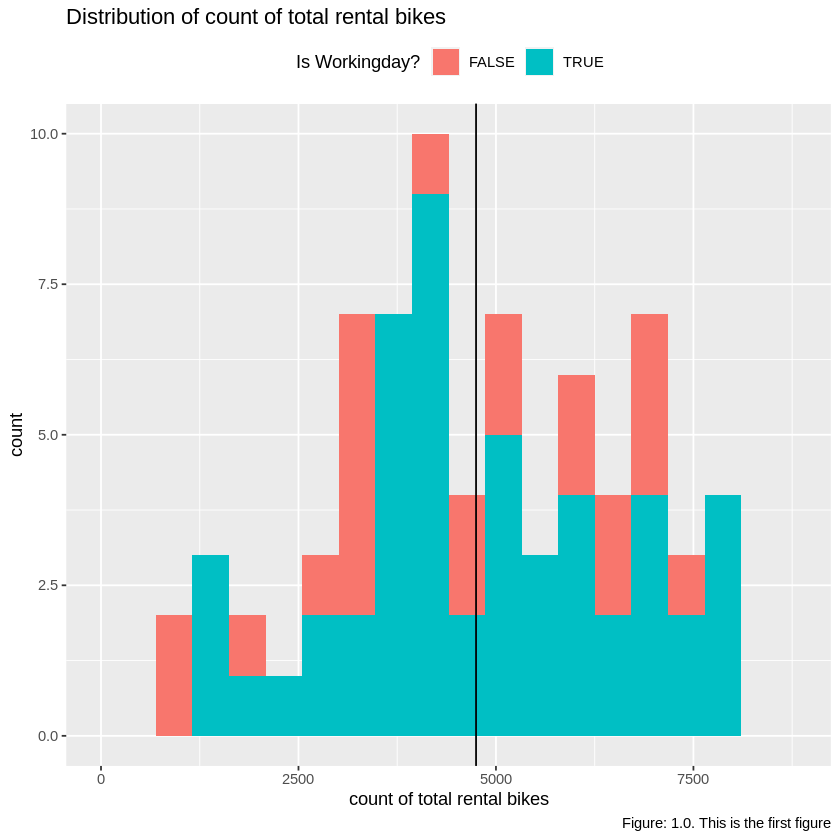

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


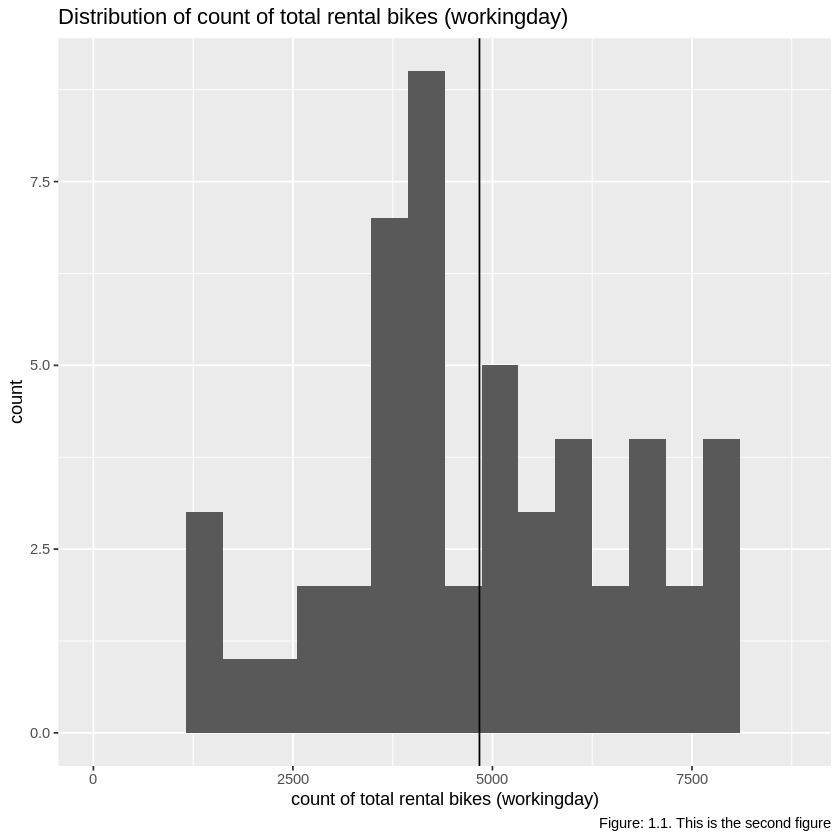

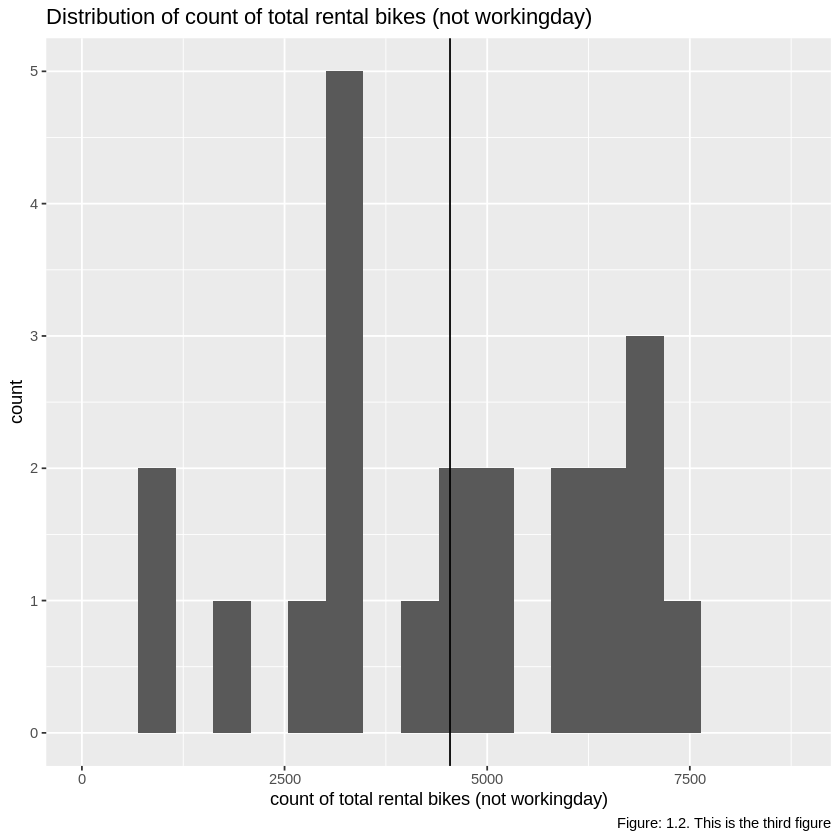

In [9]:
# Section 1
# Part 2
# visualization


all_BikeSharingData_hist <- ggplot(BikeSharingData, 
                                   aes(x = cnt, fill = isworkingday)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes", fill="Is Workingday?") +
  ggtitle("Distribution of count of total rental bikes") +
  geom_vline(xintercept = mean(BikeSharingData$cnt)) +
  theme(legend.position="top") +
  xlim(0, 8800) +
  labs(caption = figure_number.nextMajor("This is the first figure"))
  
all_BikeSharingData_hist

holiday_BikeSharingData_hist <- ggplot(workingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (workingday)") +
  ggtitle("Distribution of count of total rental bikes (workingday)") +
  geom_vline(xintercept = mean(workingday_BikeSharingData$cnt)) +
   xlim(0, 8800) +
  labs(caption = figure_number.nextMinor("This is the second figure"))

  
holiday_BikeSharingData_hist

notHoliday_BikeSharingData_hist <- ggplot(notworkingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (not workingday)") +
  ggtitle("Distribution of count of total rental bikes (not workingday)")+
  geom_vline(xintercept = mean(notworkingday_BikeSharingData$cnt)) +
  xlim(0, 8800) +
  labs(caption = figure_number.nextMinor("This is the third figure"))

  
notHoliday_BikeSharingData_hist




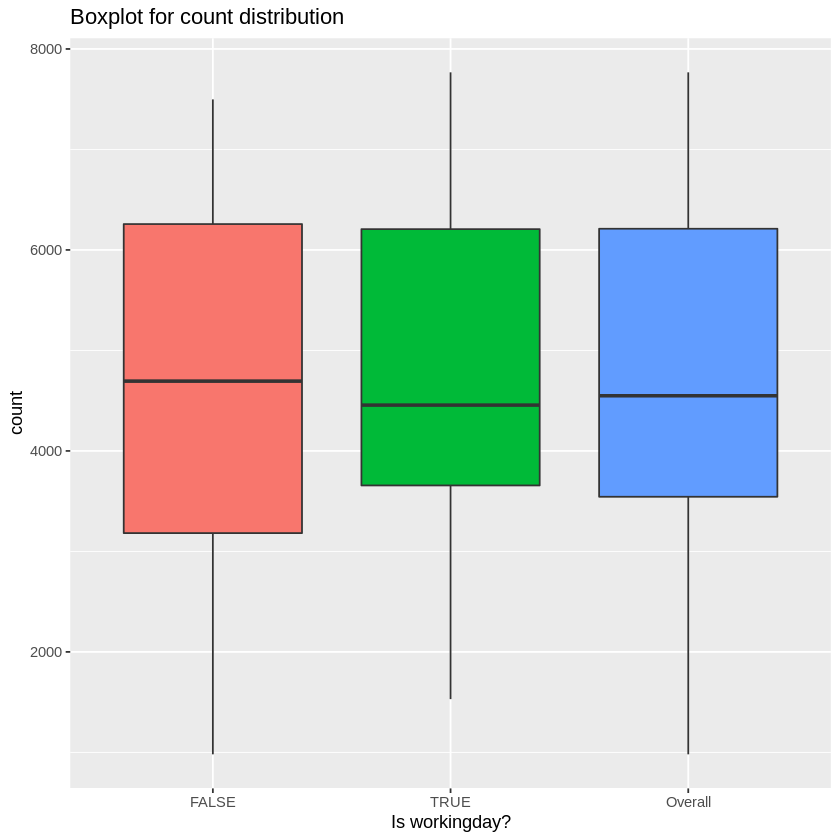

In [10]:
# Section 1
# Part 2 - continue
# visualization - Boxplot

ggplot(
    rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")), 
    aes(x=isworkingday, y=cnt, fill=isworkingday)) +
    geom_boxplot() +
    theme(legend.position="none",) +
    labs(x="Is workingday?", 
         y="count",
         fill = "") +
    ggtitle("Boxplot for count distribution")

In [11]:
# Section 2
# Part 1
# Get confidence interval for mean (all) from bootstrapping

In [12]:
sample_mean <- mean(all_BikeSharingData$cnt)

bootstrap_dist <- all_BikeSharingData %>% 
    specify(response = cnt) %>%
    generate(type = "bootstrap", reps = 1000) %>% 
    calculate(stat = "mean")

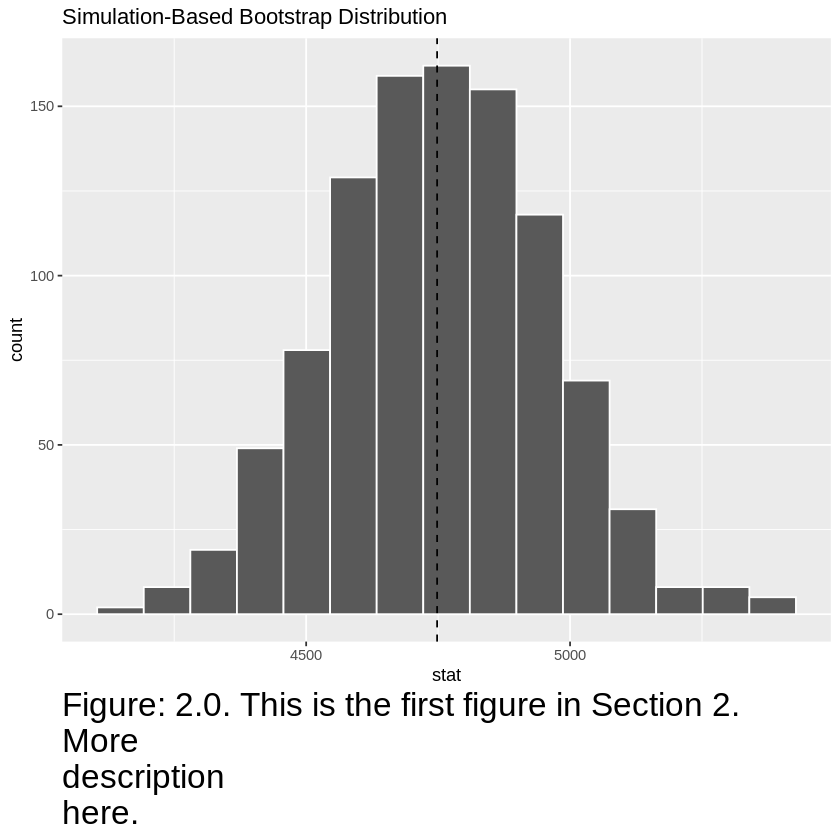

In [13]:
visualize(bootstrap_dist) + 
geom_vline(xintercept = sample_mean, linetype = "dashed")  +
  labs(caption = figure_number.nextMajor("This is the first figure in Section 2. \nMore \ndescription \nhere. ")) +
theme(plot.caption = element_text(size = 20, hjust = 0))


In [14]:
# percentile mothed
ci_percentile <- bootstrap_dist %>% 
    get_confidence_interval(level = confidence_level, type = "percentile")
ci_percentile

lower_ci,upper_ci
<dbl>,<dbl>
4354.495,5134.448


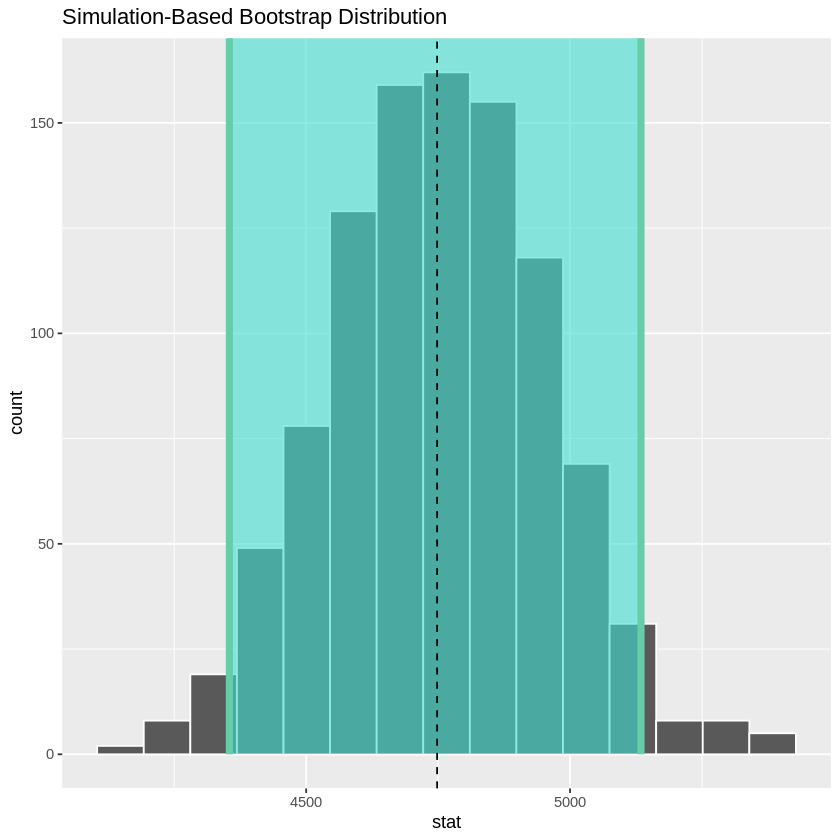

In [15]:
ci_plot_percentile <-  visualize(bootstrap_dist) + 
  shade_confidence_interval(endpoints = ci_percentile) +
    geom_vline(xintercept = sample_mean, linetype = "dashed")

ci_plot_percentile

In [16]:
# SE mothed
ci_se <- bootstrap_dist %>% 
    get_confidence_interval(point_estimate = sample_mean, level = confidence_level, type = "se")
ci_se

lower_ci,upper_ci
<dbl>,<dbl>
4346.563,5149.656


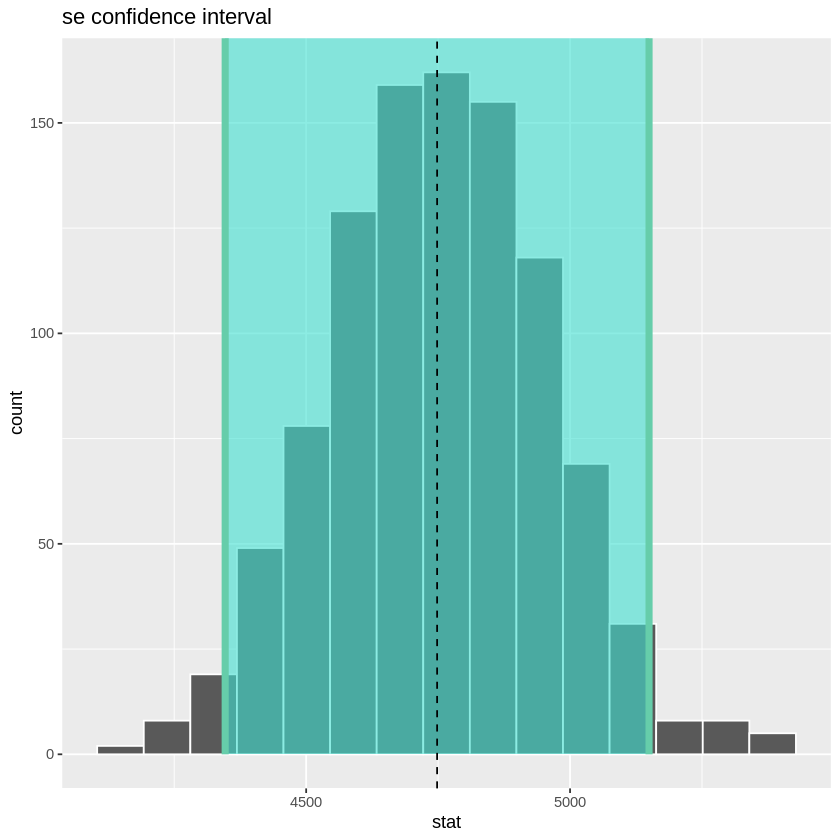

In [17]:
ci_plot_se <-  visualize(bootstrap_dist) + 
  shade_confidence_interval(endpoints = ci_se) +
    geom_vline(xintercept = sample_mean, linetype = "dashed") +
    ggtitle("se confidence interval")

ci_plot_se

In [18]:
# Section 3
# Get confidence interval from CLT

In [19]:
sample_sd <- sd(all_BikeSharingData$cnt)

se <- (sample_sd / sqrt(nrow(all_BikeSharingData)))

clt_norm_ci <- data.frame (lower_ci = c(sample_mean + qnorm((1-confidence_level)/2) * se), 
                  upper_ci = c(sample_mean + qnorm((1-(1-confidence_level)/2)) * se))
clt_norm_ci

lower_ci,upper_ci
<dbl>,<dbl>
4329.806,5166.413


In [20]:
df_t <- nrow(all_BikeSharingData) - 1

clt_t_ci <- data.frame (lower_ci = c(sample_mean + qt((1-confidence_level)/2, df_t) * se), 
                  upper_ci = c(sample_mean + qt((1-(1-confidence_level)/2), df_t) * se))
clt_t_ci

lower_ci,upper_ci
<dbl>,<dbl>
4322.656,5173.563


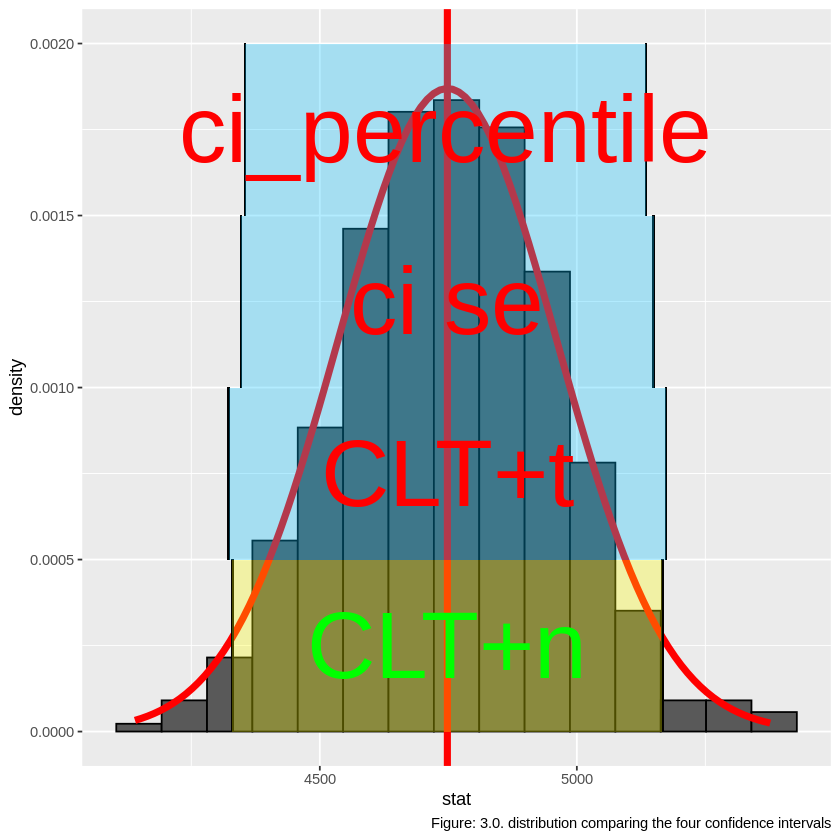

In [21]:
# Section 3
# Compare CI
addAnnotate <- function(graph, low, high, offset, label, blockColor="deepskyblue", labelColor="red") {
    res <- graph +
    geom_segment(aes(x=low, xend=low, y=offset*h, yend =(offset+1)*h)) +
    geom_segment(aes(x=high, xend=high, y=offset*h, yend =(offset+1)*h)) +
    annotate("rect", xmin = low, xmax = high, ymin = offset*h, ymax = (offset+1)*h,
             fill = blockColor,
             alpha = 0.3) +
    annotate("text", x=(low+high)/2, y=h/2+offset*h, label=label, size = 20, color=labelColor)
    return (res)
}


h <- 0.0005
p <- ggplot(bootstrap_dist, aes(x=stat)) + 
geom_histogram(aes(y = ..density..), bins = 15, colour = "black") + 
stat_function(fun = dnorm, args = list(mean = sample_mean, sd = se),
              color = "red", lwd = 2) +
  geom_vline(xintercept = sample_mean, color = "red", lwd = 2) +
labs(caption = figure_number.nextMajor("distribution comparing the four confidence intervals"))

p %>%
addAnnotate(clt_norm_ci$lower_ci, clt_norm_ci$upper_ci, 0, 'CLT+n', blockColor='yellow', labelColor="green") %>%
addAnnotate(clt_t_ci$lower_ci, clt_t_ci$upper_ci, 1, 'CLT+t') %>%
addAnnotate(ci_se$lower_ci, ci_se$upper_ci, 2, 'ci se') %>%
addAnnotate(ci_percentile$lower_ci, ci_percentile$upper_ci, 3, 'ci_percentile')


In [22]:
# Section 4
# Hypothesis test
# assume independent, the mean of the count of total rental bikes per day is NOT dependent on workingday or not.
# H_0, mean(is NOT workingday) -  mean(is workingday) = 0
# H_A, mean(is NOT workingday) -  mean(is workingday) != 0
# α = 5%

In [23]:
obs_diff_means <- BikeSharingData %>% 
  specify(formula = cnt ~ isworkingday) %>% 
  calculate(stat = "diff in means", order = c("FALSE", "TRUE"))

null_infer <- BikeSharingData %>% 
  specify(formula = cnt ~ isworkingday) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("FALSE", "TRUE"))

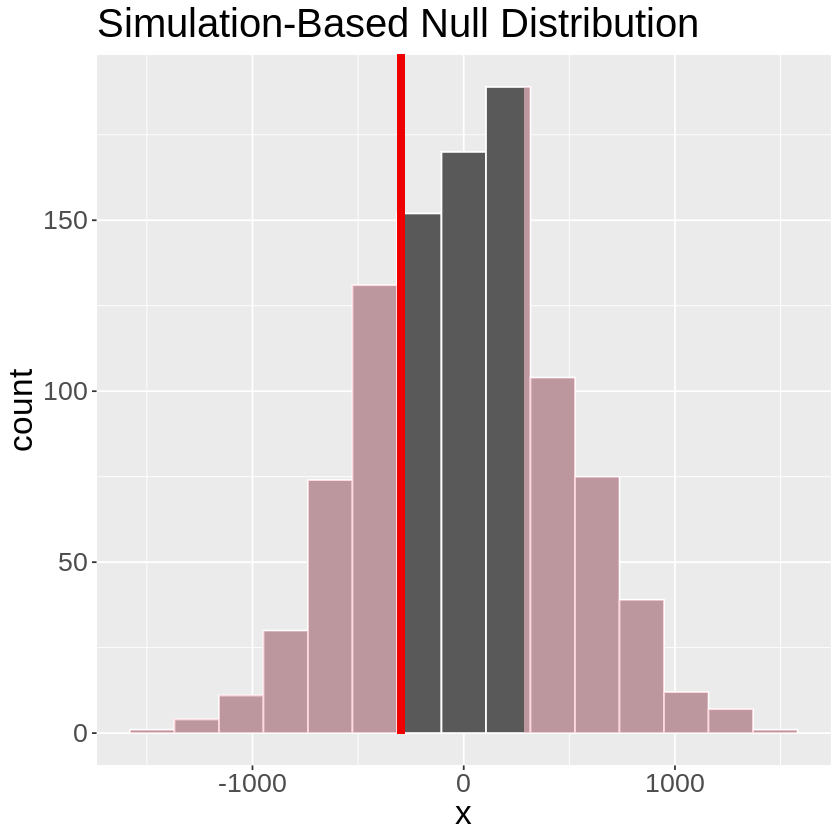

In [24]:
null_plot_infer <- null_infer %>% 
  visualize() + 
  shade_p_value(obs_stat = obs_diff_means, direction = "both") +
  xlab("x") + 
  theme(text = element_text(size=20))
null_plot_infer

In [25]:
get_p_value(null_infer, obs_stat = obs_diff_means, direction = "both")


p_value
<dbl>
0.526


In [26]:
# Section 4
# Part 2
# get p useing t.test
library(broom)
tidy(t.test(x = workingday_BikeSharingData$cnt,
        y = notworkingday_BikeSharingData$cnt),
    ) #%>%
# select(p.value)

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
295.9305,4837.294,4541.364,0.6018094,0.5511053,35.68891,-701.6554,1293.516,Welch Two Sample t-test,two.sided


In [27]:
# Section 4
# Part 3
# get p useing norm model

x_bar <- mean(workingday_BikeSharingData$cnt)
y_bar <- mean(notworkingday_BikeSharingData$cnt)
s_x <- sd(workingday_BikeSharingData$cnt)
s_y <- sd(notworkingday_BikeSharingData$cnt)
n_x <- nrow(workingday_BikeSharingData)
n_y <- nrow(notworkingday_BikeSharingData)

t <- abs((x_bar - y_bar) / sqrt(s_x^2 / n_x + s_y^2 / n_y))
t
2*(1-pnorm(t))

[1] 0.6018094

[1] 0.547301

In [28]:
# Section 4
# Part 3
# get p useing t model

df <- (s_x^2 / n_x + s_y^2 / n_y)^2 / ((s_x^4/(n_x^2*(n_x-1))) + (s_y^4/(n_y^2*(n_y-1))))
df
2*(1-pt(t, df))

[1] 35.68891

[1] 0.5511053